In [1]:
# Some Jupyter Magic for inline charts
%matplotlib inline 

# Basic Visualization with Matplotlib
Nous allons maintenant voir comment utiliser Matplotlib pour nous aider à visualiser nos expériences. Matplotlib peut être utilisé à la fois pour l'édification personnelle et pour créer des graphiques adaptés à la publication. Dans ce cahier, nous aborderons quelques notions de base. Matplotlib et, plus particulièrement, PyPlot, sont des ressources incroyablement profondes qui vous permettront de créer les graphiques les plus compliqués que votre coeur désire.

En raison de la profondeur du sujet, nous n'avons pas le temps de couvrir toutes les fonctionnalités possibles de Matplotlib, mais nous allons couvrir les bases, ici. Si vous avez déjà travaillé avec Matlab, cette section devrait vous sembler familière. Sinon, nous espérons que ce bloc-notes constituera un point de départ pour vos propres visualisations.

Le module le plus courant de Matplotlib avec lequel vous allez vous connecter est PyPlot. PyPlot contient la majorité des fonctionnalités que nous allons utiliser dans ce bloc-notes. Pour la documentation complète de PyPlot, [veuillez consulter la documentation] (http://matplotlib.org/2.0.0/contents.html).  Le notebook understanding-matplotlib.ipynb est aussi une source d'approfondissement.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## The Basic Plot

La fonctionnalité la plus élémentaire et la plus courante consiste à créer un graphique x-y simple. Ce type de graphique représente la très grande majorité des chiffres que vous voyez dans la publication. Jetons un coup d'œil à ces graphiques de base et apprenons un peu plus sur Matplotlib & PyPlot en cours de route.

In [3]:
# Define an axis of time
t  = np.linspace(0,10,1000)  # 1,000 evenly spaced points between [0,10]
# Define some value x(t)
xt = np.sin(t) + 0.1*np.sin(t*40)

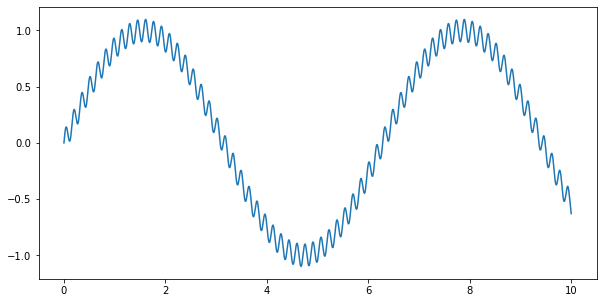

In [4]:
plt.figure(figsize=(10,5))   # Specify dimensions of the figure in (width,height)
plt.plot(t,xt)               # The most basic chart  !

C'est aussi simple que ça! Vous avez fait votre premier graphique! Bien sûr, il existe de nombreuses autres options que nous pouvons proposer pour que ce tableau atteigne la qualité de publication. Jetons un coup d'oeil à certaines de ces options, maintenant.

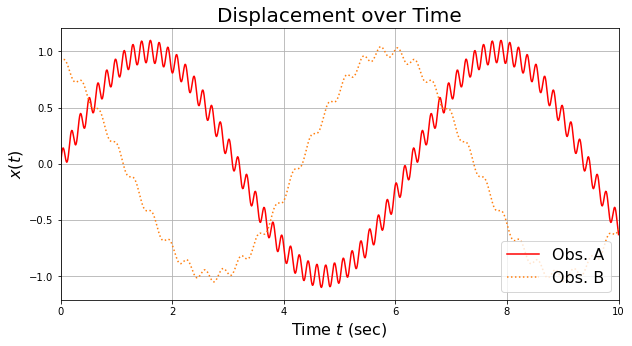

In [5]:
plt.figure(figsize=(10,5))   # Specify dimensions of the figure in (width,height)
ha = plt.plot(t,xt, label = 'Obs. A')  #  Save a copy of the plot handle

# Create some labels for the axes. You can use TeX !
plt.xlabel('Time $t$ (sec)', fontsize=16)
plt.ylabel('$x(t)$', fontsize=16)
plt.title('Displacement over Time', fontsize=20)

# Tighten the boundaries to get rid of white-space
plt.xlim([0,10])

# Do you want a grid?
plt.grid('on')

# We can re-draw features of the line after-the-fact using the plot handle
plt.setp(ha,color='r')    # Notice that this doesn't update the legend.

# We can even include another line if we feel like it
xtB = np.sin(t+2) + 0.05*np.sin(t*20)
hb = plt.plot(t,xtB,':', label='Obs. B')

# Insert a legend ! 
plt.legend(fontsize=16, loc=4)

# You can save this to disk, as well.
plt.savefig('my_first_plot.pdf', dpi=300, orientation='landscape', bbox_inches='tight')

Vous l'avez fait! Vous avez fait votre premier plot magnifique et l'avez sauvegardé sur disque!

## Visualizing Data
Revenons à notre ami Yves et examinons ce jeu de données `StochasticClimber`. Nous avons réussi à diriger le grimpeur, mais malheureusement, il n'y avait rien d'intéressant à regarder. Voyons comment Yves a fait son voyage d'escalade.

Premièrement, nous devons recharger le jeu de données. Nous pouvons accomplir cela facilement via le cornichon que nous avons économisé ou le CSV. Ici, nous allons utiliser le CSV et le charger à travers des pandas.

In [6]:
import pandas as pd

# Load the CSV dataset... simple !
yvesDF = pd.read_csv('yves.csv')
yvesDF

,x,y,z
0,0.00,0.00,0.000000
1,0.00,0.05,0.014171
2,0.05,0.05,0.017222
3,0.05,0.10,0.020722
4,0.05,0.05,0.017222
...,...,...,...
39995,2.00,1.95,14.143903
39996,2.05,1.95,12.493603
39997,2.05,2.00,14.154771
39998,2.10,2.00,9.762398


Comme nous le voyons ci-dessus, Jupyter dispose déjà de fonctionnalités d’affichage intéressantes pour les Pandas DataFrames (ici, il les affiche sous forme de tableau). Alors, où est allé Yves dans son voyage? 

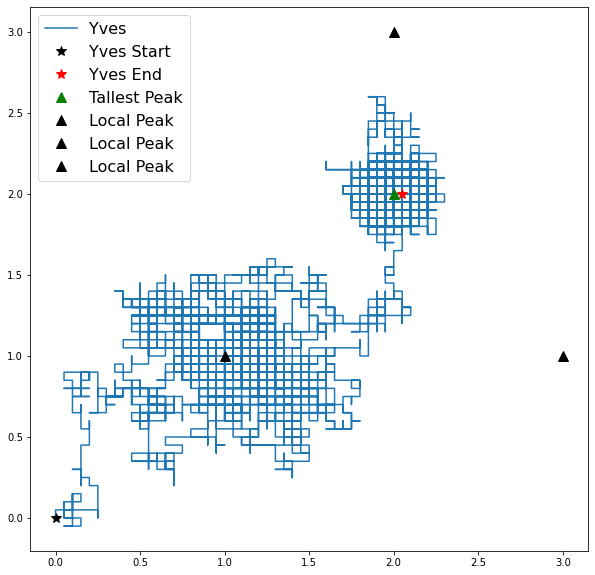

In [7]:
plt.figure(figsize=(10,10))

# Show Yves' Path
plt.plot(yvesDF['x'],yvesDF['y'],label='Yves')

# Show his starting and ending points
plt.plot(0,0,'*k',markerfacecolor='k',markersize=10, label='Yves Start')
plt.plot(yvesDF['x'][-1:],yvesDF['y'][-1:],'*r',markerfacecolor='r',markersize=10, label='Yves End')

# Show the true peaks
plt.plot(2,2,'^g',markerfacecolor='g',markersize=10, label='Tallest Peak')
plt.plot(1,1,'^k',markerfacecolor='k',markersize=10, label='Local Peak')
plt.plot(3,1,'^k',markerfacecolor='k',markersize=10, label='Local Peak')
plt.plot(2,3,'^k',markerfacecolor='k',markersize=10, label='Local Peak')

plt.legend(loc=2,fontsize=16)

Nous avons donc à présent un tableau assez intéressant détaillant les endroits où Yves est allé sur la carte.

Mais pouvons-nous avoir une idée du temps qu’il a passé à certains endroits? Une façon rapide et sale est de changer la largeur de la ligne. Lorsque la largeur de la ligne est inférieure à «1», elle inclut un effet de transparence. Cette transparence se compose lorsque la ligne de tracé se croise.

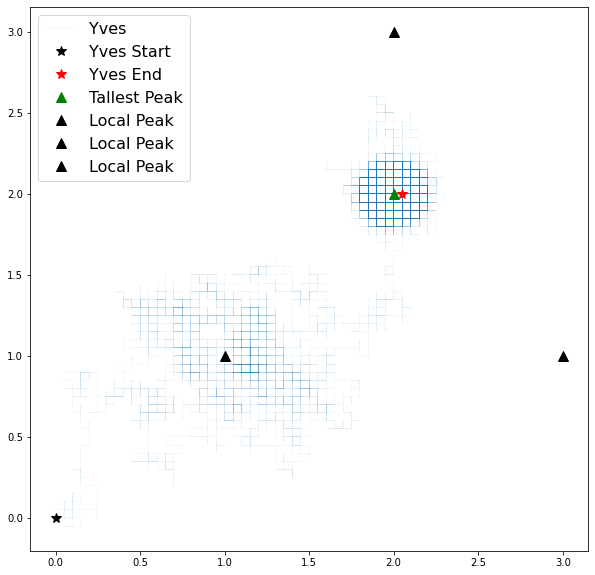

In [8]:
plt.figure(figsize=(10,10))

# Show Yves' Path
plt.plot(yvesDF['x'],yvesDF['y'],label='Yves', linewidth=0.05)

# Show his starting and ending points
plt.plot(0,0,'*k',markerfacecolor='k',markersize=10, label='Yves Start')
plt.plot(yvesDF['x'][-1:],yvesDF['y'][-1:],'*r',markerfacecolor='r',markersize=10, label='Yves End')

# Show the true peaks
plt.plot(2,2,'^g',markerfacecolor='g',markersize=10, label='Tallest Peak')
plt.plot(1,1,'^k',markerfacecolor='k',markersize=10, label='Local Peak')
plt.plot(3,1,'^k',markerfacecolor='k',markersize=10, label='Local Peak')
plt.plot(2,3,'^k',markerfacecolor='k',markersize=10, label='Local Peak')

plt.legend(loc=2,fontsize=16)

Nous voyons donc que l’effet final est une "densité", ce qui nous montre que Yves passe le plus clair de son temps autour des sommets.

Nous pouvons même faire des tracés 3D. Par exemple, si nous voulions tracer le chemin d’Yves avec sa hauteur, nous pourrons ainsi avoir une idée de la pente des montagnes qu’il a gravies. Nous pouvons également le faire en spécifiant un axe 3D.

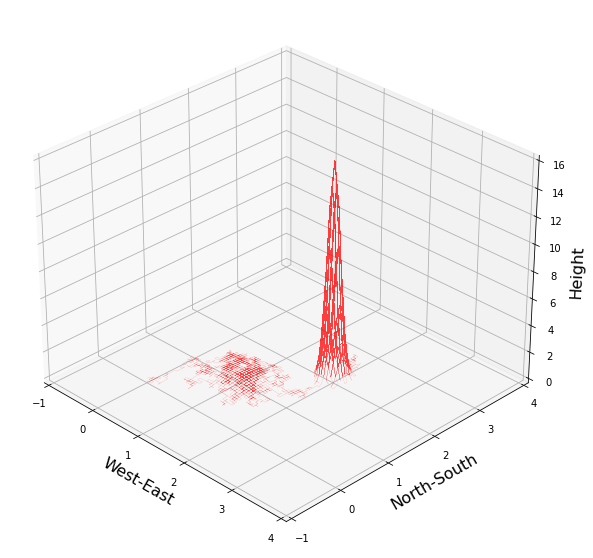

In [9]:
# Import some extra tools
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
# Set a 3D axis
ax = fig.add_subplot(111, projection='3d')

# Use the 3D axis for plotting
ax.plot(yvesDF['x'], yvesDF['y'], yvesDF['z'], 'r', linewidth=0.1, alpha=0.75)
ax.set_xlabel('West-East', fontsize=16)
ax.set_ylabel('North-South', fontsize=16)
ax.set_zlabel('Height', fontsize=16)
plt.xlim((-1,4))
plt.ylim((-1,4))
ax.view_init(30, -45)

Nous pouvons même regarder où Yves s'est le plus attardé en termes de sa position (x, y).

Text(0.5, 1.0, 'Dwell Time, Vertical')

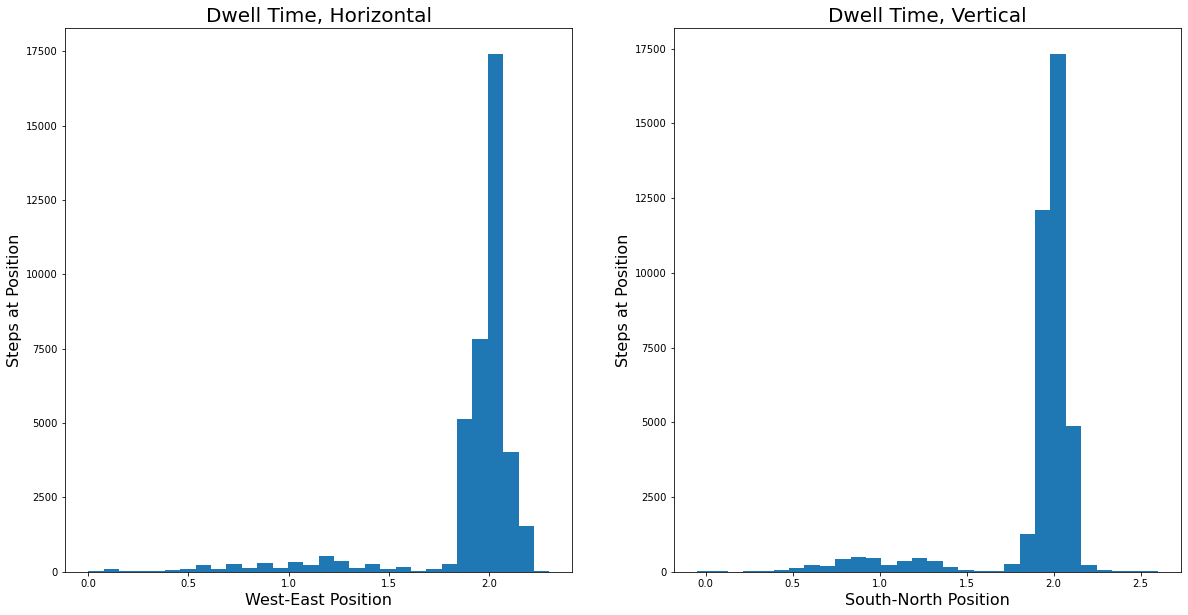

In [10]:
plt.figure(figsize=(20,10))
# Histogram of X locations
plt.subplot(121)
plt.hist(yvesDF['x'], bins = 30);
plt.xlabel('West-East Position', fontsize=16)
plt.title('Dwell Time, Horizontal', fontsize=20)
plt.ylabel('Steps at Position', fontsize=16)

plt.subplot(122);
plt.hist(yvesDF['y'], bins = 30);
plt.xlabel('South-North Position', fontsize=16)
plt.ylabel('Steps at Position', fontsize=16)
plt.title('Dwell Time, Vertical', fontsize=20)


On voit donc qu'Yves a passé la majeure partie de son temps autour du plus haut sommet. Mais une fois arrivé là-bas, est-il resté là?

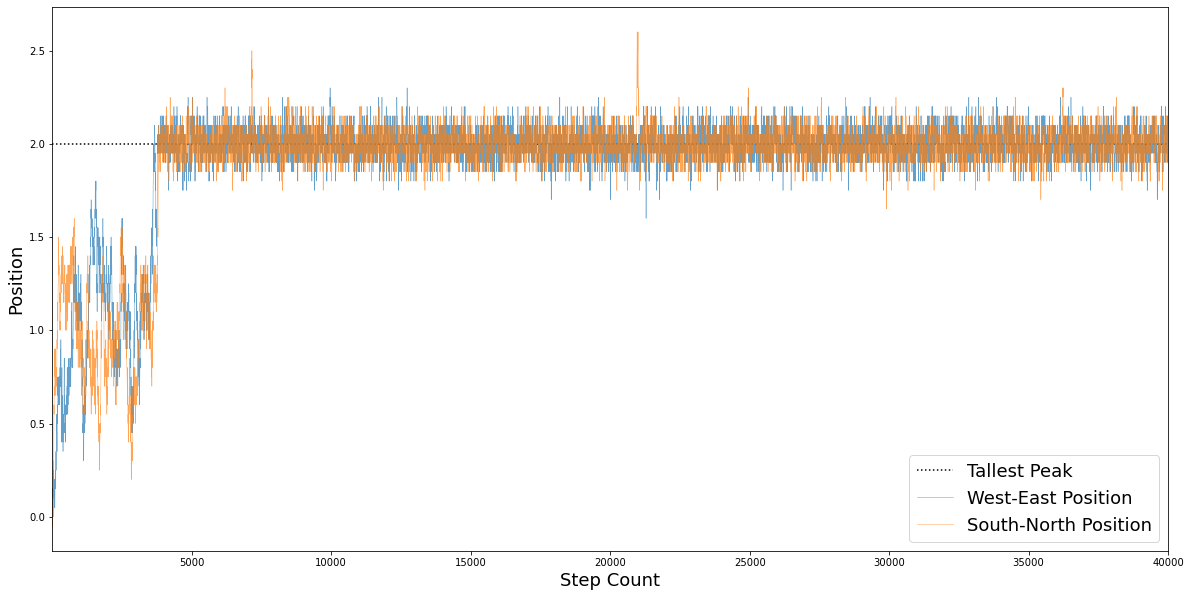

In [11]:
# Get the number of steps Yves took
maxstep = len(yvesDF['x'])

plt.figure(figsize=(20,10))

# Plot the position of the true tallest peak
plt.plot([0, maxstep],[2, 2],':k', label='Tallest Peak')

# Plot Yves Path
plt.plot(yvesDF['x'], linewidth=0.5, label='West-East Position', alpha=0.7)
plt.plot(yvesDF['y'], linewidth=0.5, label='South-North Position', alpha=0.7)

# Formatting
plt.xlim([1,maxstep])
plt.xlabel('Step Count', fontsize=18)
plt.ylabel('Position', fontsize=18)
plt.legend(loc=4, fontsize=18)

Ou, d'une autre manière, nous pouvons également examiner la distance qui sépare Yves du plus haut sommet.

(0.0, 3.0)

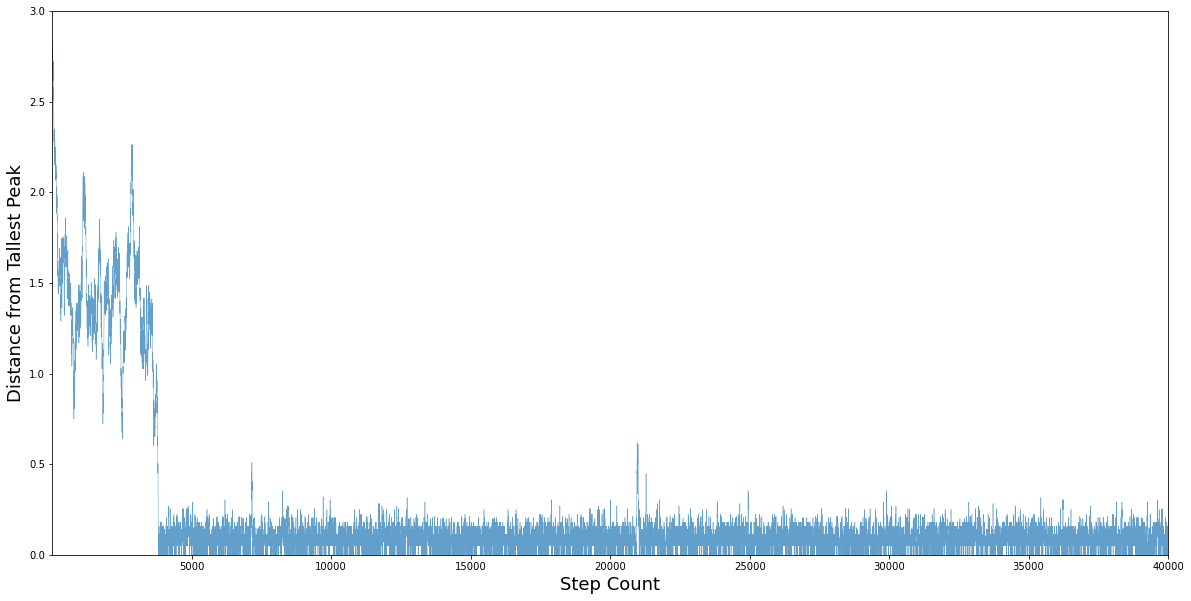

In [12]:
# Calculate Euclidean distance from peak
d = np.sqrt((yvesDF['x'] - 2)**2 + (yvesDF['y'] - 2)**2)

plt.figure(figsize=(20,10))

# Plot Yves Path
plt.plot(d, linewidth=0.5,  alpha=0.7)

# Formatting
plt.xlim([1,maxstep])
plt.xlabel('Step Count', fontsize=18)
plt.ylabel('Distance from Tallest Peak', fontsize=18)
plt.ylim([0,3])

Nous pouvons voir qu’à la fin, Yves reste assez près du plus haut sommet. Il semble qu'une fois arrivé, il reste dans les parages. Mais pourquoi voyons-nous cette variation autour de la valeur centrale? Eh bien, rappelez-vous que nous avons sélectionné une taille de grille de 0,05. Nous devrions nous attendre à voir cette variation de «largeur de grille» autour du pic... verifions:

In [13]:
np.sqrt(np.var(d[25000:]))

0.04973316456672391

En effet, nous retrouvons ici une variance autour de ~ 0,05 + - 0,01. On voit donc qu'Yves se déplace principalement en boucles serrées au sommet du plus haut sommet de la montagne! Il semble que sa stratégie stochastique ait porté ses fruits :)